# Covid-19 (Coronavirus) Analytics and Forecasting

***
*WORK IN PROGRESS*
***

Note - All data was gathered and prepared on the [Covid19_Data_ETL.ipynb](https://github.com/BrianLeip/CoronaVirus/blob/master/Covid19_Data_ETL.ipynb) notebook prior to loading into this notebook, following standard best practices for data analytics.

## Data Sources

### Primary Data Source: Johns Hopkins CSSE Data Repository 
- Link: https://github.com/CSSEGISandData/COVID-19  
- **Live data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US County (cases, deaths)
- **Historic time series data:**
    - Countries (cases, deaths, recoveries, active)
    - US States (cases, deaths)
    - US Counties (cases, deaths)

### --PENDING-- US State Testing and Hospitalizations: Covid Tracking Project 
- Link: https://covidtracking.com/data/ 
- **Live data:**
    - US State testing and hopspitalization, ICU stats --PENDING--
- **Historic time series data:**
    - US State testing and hopspitalization, ICU stats --PENDING--

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import os
import seaborn as sns

In [2]:
sns.set()
sns.set_style("whitegrid")
sns.set_palette("Paired")
#sns.palplot(sns.color_palette("Paired", n_colors=15))

## Load the Data
See the Covid19_Data_ETL notebook for info on the data gathering and wrangling process.  
All original data left unchanged, only the format was changed to make it preferable to work with for EDA and Data Viz

### Dataset 1: John Hopkins

In [3]:
jh_live_global = pd.read_csv('Datasets/JH/jh_live_global_orig.csv')

In [4]:
jh_live_countries = pd.read_csv('Datasets/JH/jh_live_countries.csv', index_col=0)

In [5]:
jh_live_usstates = pd.read_csv('Datasets/JH/jh_live_usstates.csv', index_col=0)

In [6]:
jh_live_uscounties = pd.read_csv('Datasets/JH/jh_live_uscounties.csv', index_col=[0,1])

In [7]:
jh_hist_countries_cases = pd.read_csv('Datasets/JH/jh_hist_countries_cases.csv', index_col=0, parse_dates=True)

In [8]:
jh_hist_countries_cases_pct = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct.csv', index_col=0, parse_dates=True)

In [9]:
jh_hist_countries_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [10]:
jh_hist_countries_deaths = pd.read_csv('Datasets/JH/jh_hist_countries_deaths.csv', index_col=0, parse_dates=True)

In [11]:
jh_hist_countries_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct.csv', index_col=0, parse_dates=True)

In [12]:
jh_hist_countries_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [13]:
jh_hist_countries_recovered = pd.read_csv('Datasets/JH/jh_hist_countries_recovered.csv', index_col=0, parse_dates=True)

In [14]:
jh_hist_countries_recovered_pct = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct.csv', index_col=0, parse_dates=True)

In [15]:
jh_hist_countries_recovered_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_countries_recovered_pct_ewma.csv', index_col=0, parse_dates=True)

In [16]:
jh_hist_usstates_cases = pd.read_csv('Datasets/JH/jh_hist_usstates_cases.csv', index_col=0, parse_dates=True)

In [17]:
jh_hist_usstates_cases_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct.csv', index_col=0, parse_dates=True)

In [18]:
jh_hist_usstates_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_cases_pct_ewma.csv', index_col=0, parse_dates=True)

In [19]:
jh_hist_usstates_deaths = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths.csv', index_col=0, parse_dates=True)

In [20]:
jh_hist_usstates_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct.csv', index_col=0, parse_dates=True)

In [21]:
jh_hist_usstates_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_usstates_deaths_pct_ewma.csv', index_col=0, parse_dates=True)

In [22]:
jh_hist_uscounties_cases = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases.csv', index_col=0, header=[0,1], parse_dates=True)

In [23]:
jh_hist_uscounties_cases_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [24]:
jh_hist_uscounties_cases_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_cases_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

In [25]:
jh_hist_uscounties_deaths = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths.csv', index_col=0, header=[0,1], parse_dates=True)

In [26]:
jh_hist_uscounties_deaths_pct = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct.csv', index_col=0, header=[0,1], parse_dates=True)

In [27]:
jh_hist_uscounties_deaths_pct_ewma = pd.read_csv('Datasets/JH/jh_hist_uscounties_deaths_pct_ewma.csv', index_col=0, header=[0,1], parse_dates=True)

### Dataset 2: Covid Tracking Project

** PENDING **

## Prep Some Commonly Used Data (e.g. current date for each dataset)

In [28]:
jh_live_date = jh_live_global['Last_Update'][0]
jh_live_date = pd.to_datetime(jh_live_date)
jh_live_date = pd.Timestamp(jh_live_date.year, jh_live_date.month, jh_live_date.day)
jh_live_date

Timestamp('2020-06-22 00:00:00')

In [29]:
jh_hist_date = jh_hist_countries_cases.index[-1]
jh_hist_date

Timestamp('2020-06-21 00:00:00')

In [30]:
# Date to zoom in on for charting recent data
zoom_date = '3/15/2020'
zoom_date2 = '4/1/2020'
zoom_date3 = '4/15/2020'
zoom_date4 = '5/1/2020'
zoom_date5 = '5/15/2020'
zoom_date6 = '6/1/2020'

## Exploratory Data Analysis (EDA)

### Global and Country Level

In [31]:
# Total Global confirmed cases, deaths, recovered, and active (live)
pd.DataFrame(jh_live_countries[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum() )

,0
Confirmed,8954125
Deaths,468357
Recovered,4447086
Active,4038682


In [32]:
# Top countries by confirmed count as of latest date
top_25_countries = jh_live_countries.nlargest(25, 'Confirmed')
top_10_countries = jh_live_countries.nlargest(10, 'Confirmed')
top_10_countries.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Country_Region,,,,,,,
US,2279879,119969,622133,1537777,2020-06-22 04:33:20,38.262359,-91.476410
Brazil,1085038,50617,600576,433845,2020-06-22 04:33:20,-12.669522,-48.480493
Russia,583879,8101,339142,236636,2020-06-22 04:33:20,54.546312,62.120860
India,425282,13699,237196,174387,2020-06-22 04:33:20,23.356511,82.081064
United Kingdom,305803,42717,1319,261767,2020-06-22 04:33:20,30.744028,-35.367255


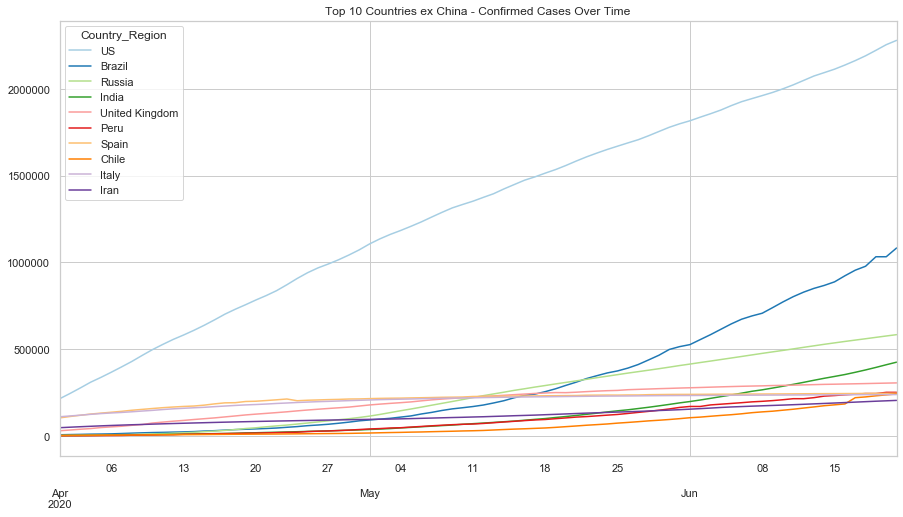

In [33]:
# Plot the top 10 countries confirmed infections over time
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date2:, top_10_countries.index].plot(figsize=(15,8), title="Top 10 Countries ex China - Confirmed Cases Over Time")

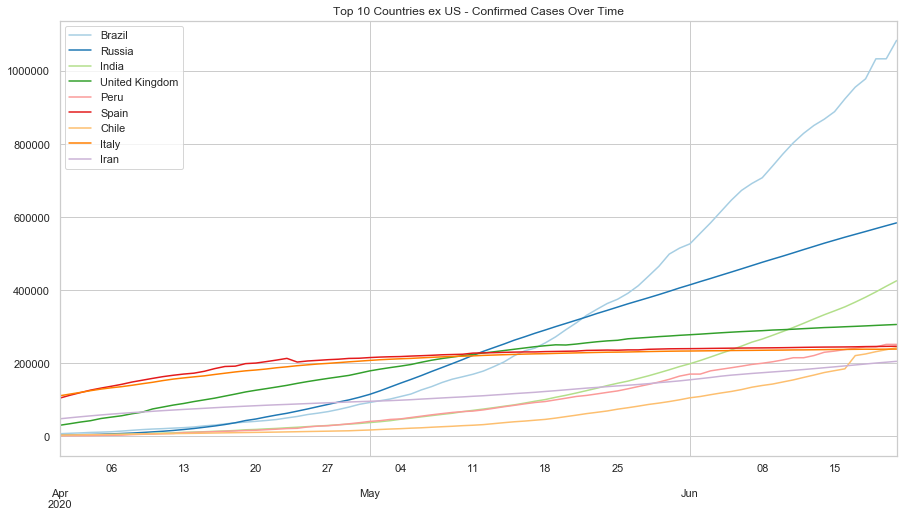

In [34]:
# Same chart but excluding US and starting on April 1 to zoom in
jh_hist_countries_cases[top_10_countries.index].loc[zoom_date2:, top_10_countries.index != 'US'].plot(figsize=(15,8), title="Top 10 Countries ex US - Confirmed Cases Over Time")

### US State Level

In [35]:
# Top US States by confirmed cases
top_20_states = jh_live_usstates.nlargest(20, 'Confirmed')
top_10_states = jh_live_usstates.nlargest(10, 'Confirmed')
top_10_states

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long
Province_State,,,,,,,
New York,387936,31125,0,356811,2020-06-22 04:33:20,42.671593,-75.579694
California,178546,5515,0,173031,2020-06-22 04:33:20,37.778248,-120.728666
New Jersey,169142,12939,0,156203,2020-06-22 04:33:20,40.286441,-74.622450
Illinois,136762,6647,0,130115,2020-06-22 04:33:20,39.843618,-89.178330
Texas,112944,2191,0,110753,2020-06-22 04:33:20,31.677778,-98.540144
Massachusetts,107061,7857,0,99204,2020-06-22 04:33:20,42.176400,-71.577050
Florida,97291,3161,0,94130,2020-06-22 04:33:20,28.940755,-82.700744
Pennsylvania,85935,6423,0,79512,2020-06-22 04:33:20,40.818078,-77.615318
Michigan,67711,6090,0,61621,2020-06-22 04:33:20,44.011649,-85.131303


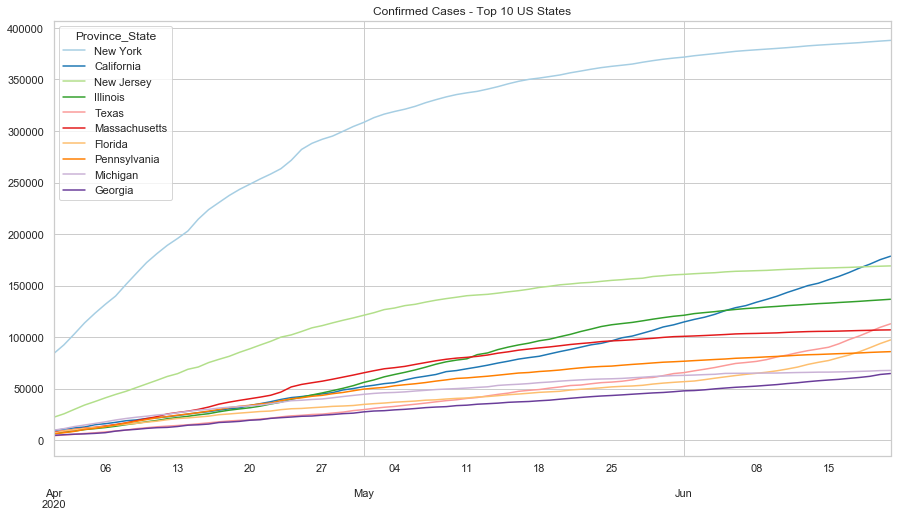

In [36]:
# Chart the top states with confirmed positive
jh_hist_usstates_cases.loc[zoom_date2:, top_10_states.index].plot(title='Confirmed Cases - Top 10 US States', figsize=(15,8))

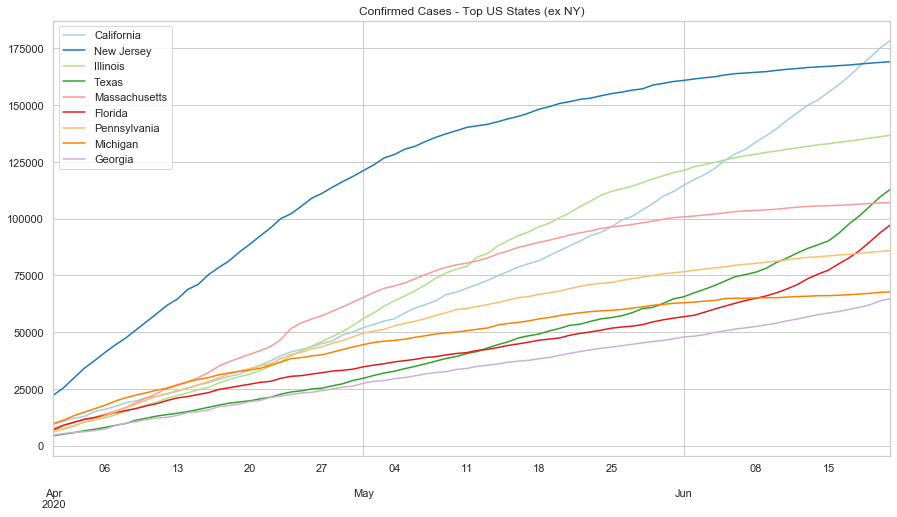

In [37]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_cases[top_10_states.index].loc[zoom_date2:, top_10_states.index != 'New York'].plot(title='Confirmed Cases - Top US States (ex NY)', figsize=(15,8))

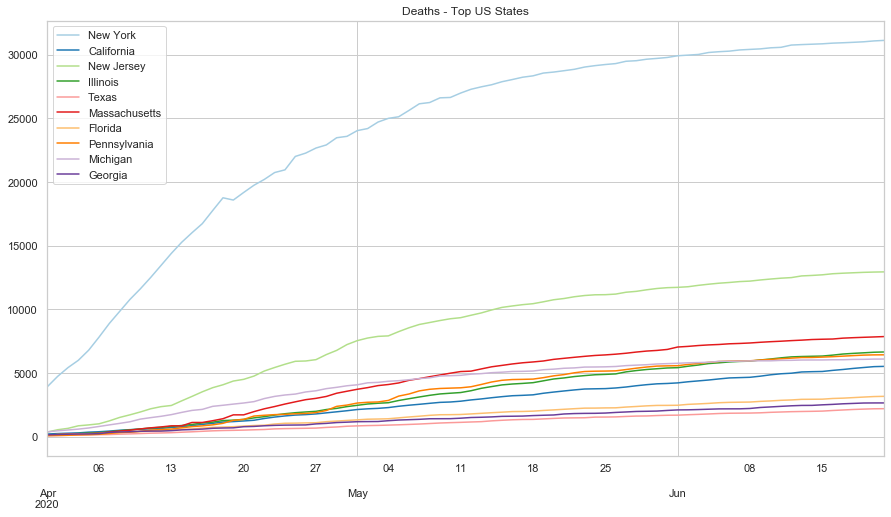

In [38]:
# Chart the top states of by # of deaths
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date2:, :].plot(title='Deaths - Top US States', figsize=(15,8))

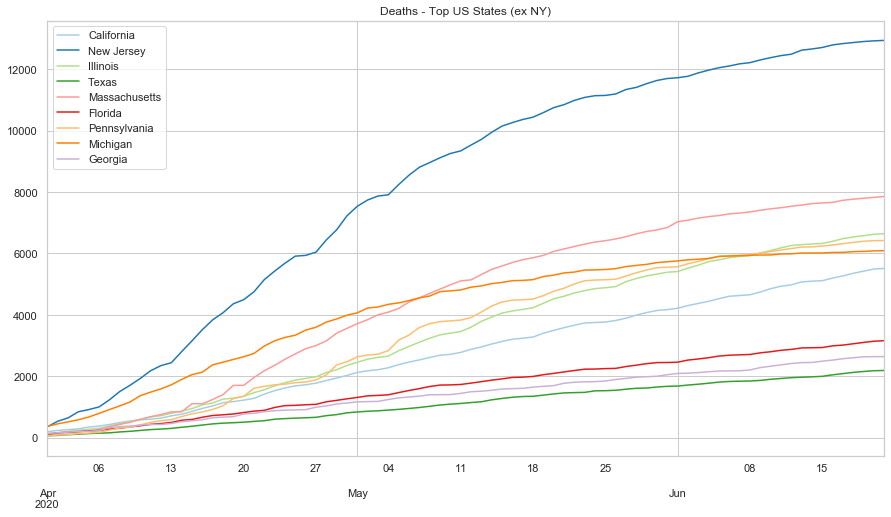

In [39]:
# The same chart but this time without NY to zoom in on the others
jh_hist_usstates_deaths[top_10_states.index].loc[zoom_date2:, top_10_states.index != 'New York'].plot(title='Deaths - Top US States (ex NY)', figsize=(15,8))

### US County Level

In [40]:
top_counties_NY = jh_live_uscounties.loc['New York'].nlargest(10, 'Confirmed')
top_counties_NY.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
New York City,212446,22278,0,190168,2020-06-22 04:33:20,40.767273,-73.971526,36061.0
Nassau,41479,2178,0,39301,2020-06-22 04:33:20,40.740665,-73.589419,36059.0
Suffolk,40972,1964,0,39008,2020-06-22 04:33:20,40.883201,-72.801217,36103.0
Westchester,34521,1414,0,33107,2020-06-22 04:33:20,41.162784,-73.757417,36119.0
Rockland,13504,667,0,12837,2020-06-22 04:33:20,41.150279,-74.025605,36087.0


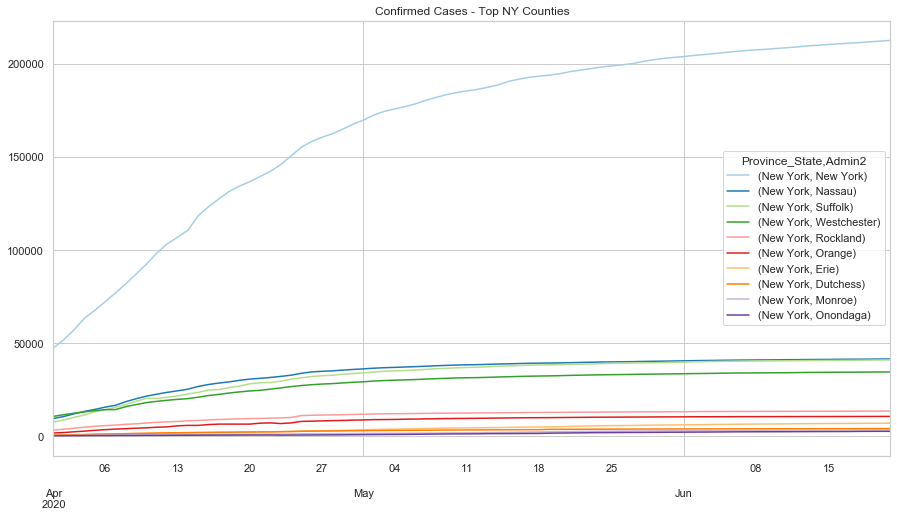

In [41]:
# Chart the NY Counties confirmed cases over time
top_counties_NY_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_cases.plot(title='Confirmed Cases - Top NY Counties', figsize=(15,8))

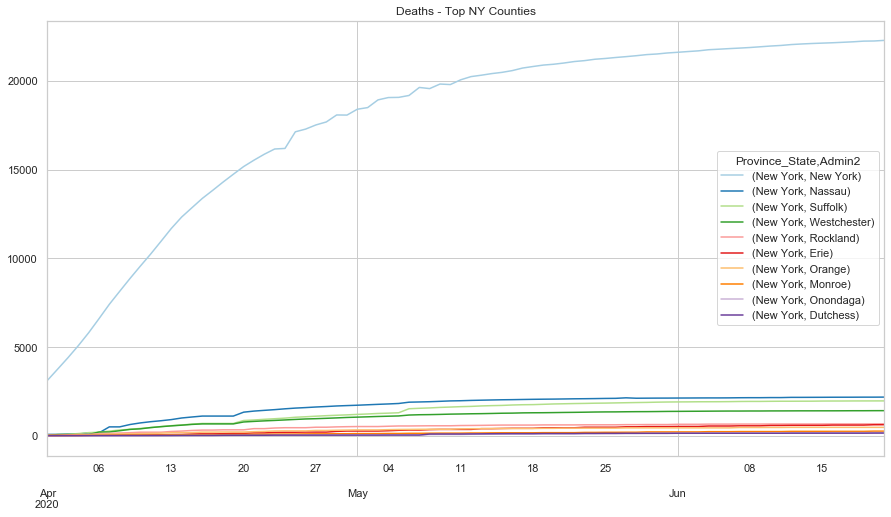

In [42]:
# Chart the NY Counties deaths over time
top_counties_NY_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('New York')].nlargest(10).index
top_counties_NY_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('New York', top_counties_NY_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_NY_deaths.plot(title='Deaths - Top NY Counties', figsize=(15,8))

In [43]:
top_counties_MA = jh_live_uscounties.loc['Massachusetts'].nlargest(10, 'Confirmed')
top_counties_MA.head()

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Middlesex,23574,1807,0,21767,2020-06-22 04:33:20,42.486077,-71.390492,25017.0
Suffolk,19551,978,0,18573,2020-06-22 04:33:20,42.327951,-71.078504,25025.0
Essex,15829,1076,0,14753,2020-06-22 04:33:20,42.668763,-70.946872,25009.0
Worcester,12130,900,0,11230,2020-06-22 04:33:20,42.350270,-71.904934,25027.0
Norfolk,8994,912,0,8082,2020-06-22 04:33:20,42.160731,-71.205304,25021.0


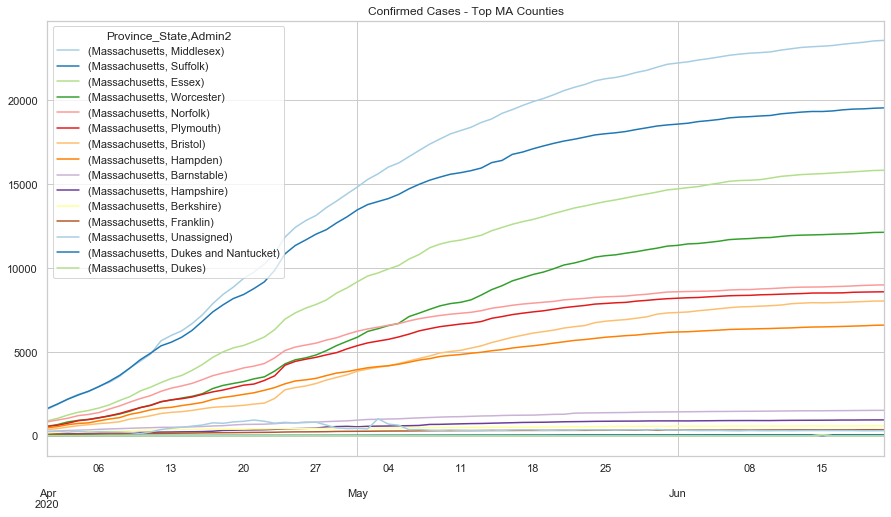

In [44]:
# Chart the MA Counties confirmed cases over time
top_counties_MA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('Massachusetts')].nlargest(15).index
top_counties_MA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_cases.plot(title='Confirmed Cases - Top MA Counties', figsize=(15,8))

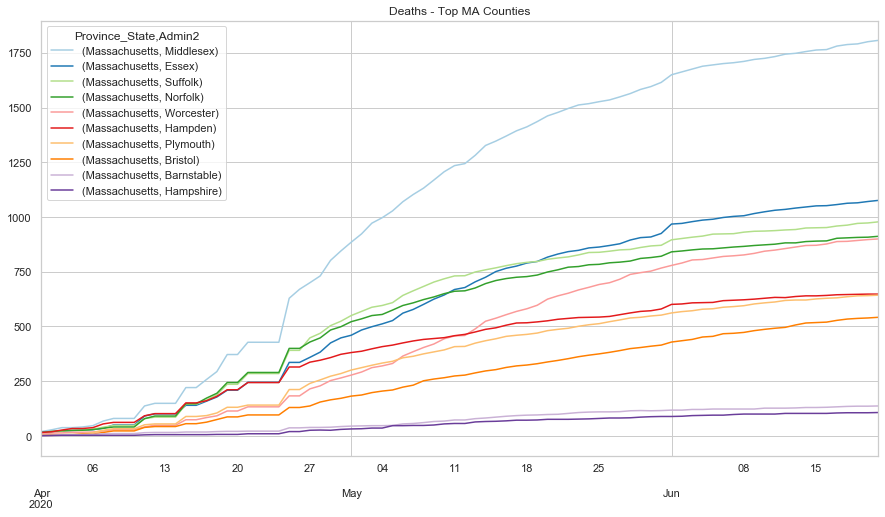

In [45]:
# Chart the MA County deaths over time
top_counties_MA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('Massachusetts')].nlargest(10).index
top_counties_MA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('Massachusetts', top_counties_MA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_MA_deaths.plot(title='Deaths - Top MA Counties', figsize=(15,8))

In [46]:
top_counties_CA = jh_live_uscounties.loc['California'].nlargest(15, 'Confirmed')
top_counties_CA.head(7)

,Confirmed,Deaths,Recovered,Active,Last_Update,Lat,Long,FIPS
Admin2,,,,,,,,
Los Angeles,83414,3121,0,80293,2020-06-22 04:33:20,34.308284,-118.228241,6037.0
Riverside,12778,410,0,12368,2020-06-22 04:33:20,33.743150,-115.993358,6065.0
San Diego,10794,338,0,10456,2020-06-22 04:33:20,33.034846,-116.736533,6073.0
Orange,10422,269,0,10153,2020-06-22 04:33:20,33.701475,-117.764600,6059.0
San Bernardino,9156,233,0,8923,2020-06-22 04:33:20,34.840603,-116.177469,6071.0
Alameda,4924,119,0,4805,2020-06-22 04:33:20,37.646294,-121.892927,6001.0
Imperial,4800,64,0,4736,2020-06-22 04:33:20,33.039308,-115.366904,6025.0


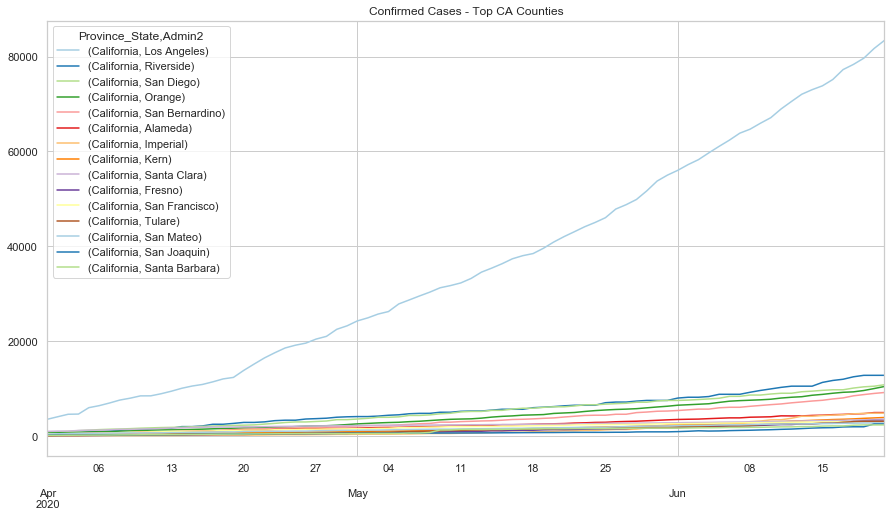

In [47]:
# Chart the CA Counties confirmed cases over time
top_counties_CA_filter = jh_hist_uscounties_cases.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_cases = jh_hist_uscounties_cases.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_cases.plot(title='Confirmed Cases - Top CA Counties', figsize=(15,8))

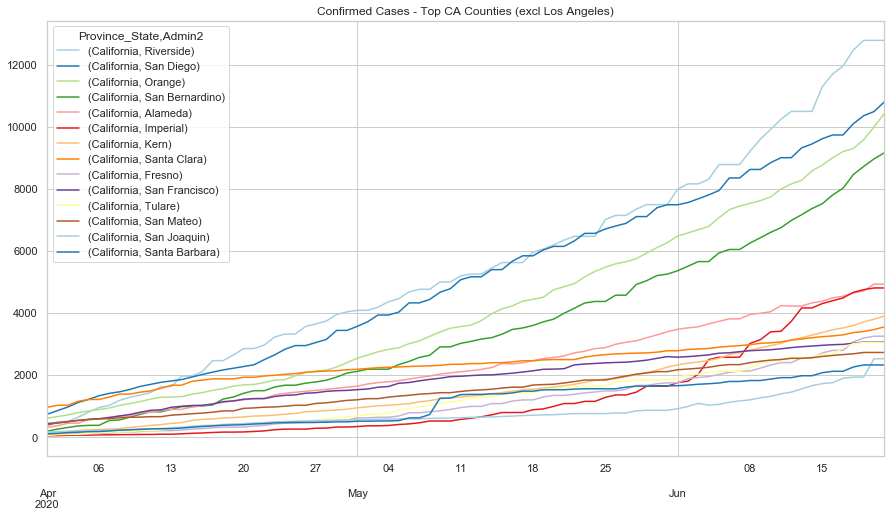

In [48]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_cases = top_counties_CA_cases.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_cases.plot(title='Confirmed Cases - Top CA Counties (excl Los Angeles)', figsize=(15,8))

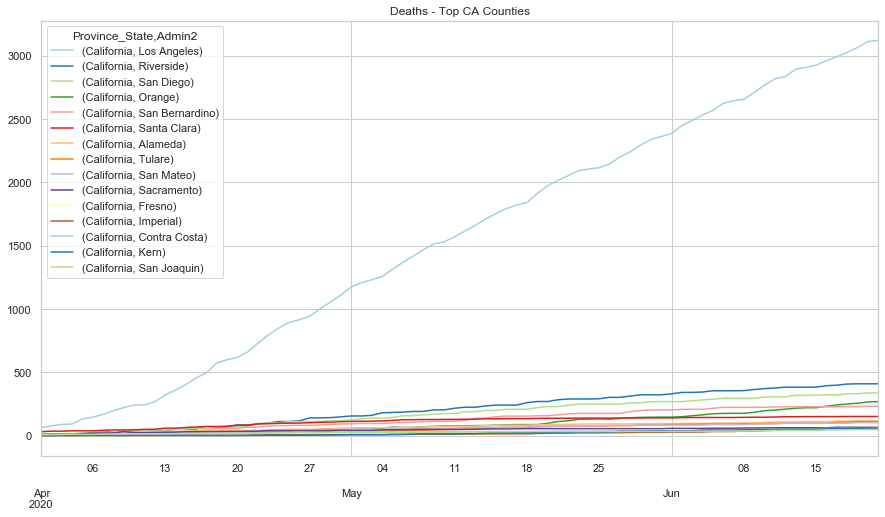

In [49]:
# Chart the CA Counties deaths over time
top_counties_CA_filter = jh_hist_uscounties_deaths.loc[jh_hist_date, ('California')].nlargest(15).index
top_counties_CA_deaths = jh_hist_uscounties_deaths.loc[zoom_date2:, ('California', top_counties_CA_filter)].sort_values(axis=1, by=jh_hist_date, ascending=False)
top_counties_CA_deaths.plot(title='Deaths - Top CA Counties', figsize=(15,8))

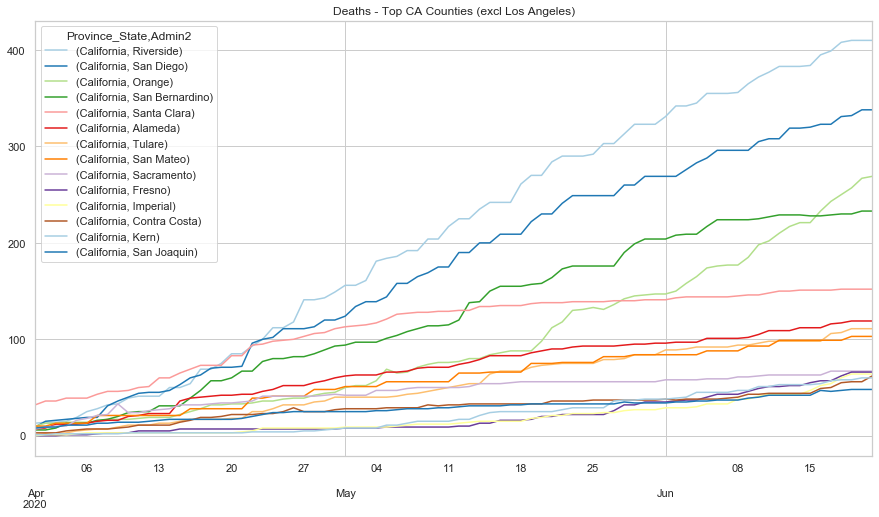

In [50]:
# Same chart but excluding Los Angeles to zoom in on the others
top_counties_CAexLA_deaths = top_counties_CA_deaths.loc[:, ('California', top_counties_CA_filter != 'Los Angeles')]
top_counties_CAexLA_deaths.plot(title='Deaths - Top CA Counties (excl Los Angeles)', figsize=(15,8))

### Which Countries / US States / US Counties are becoming hot spots, or conversely, cooling down?  
This section uses the daily percentage changes, smoothed by an exponentially weighted moving average to minimize daily outliers, while giving more weight to more recent data vs what a simple moving average would.  

#### Prominent Countries

For reference, start by showing the recent EWMA of daily % change for prominent countries (making headlines related to Covid-19)

In [51]:
prominent_countries_filter = ['US', 'China', 'Brazil', 'Russia', 'Italy', 'United Kingdom']
prominent_countries = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, prominent_countries_filter]
prominent_countries

US                0.012458
China             0.000343
Brazil            0.034990
Russia            0.013761
Italy             0.000834
United Kingdom    0.004135
Name: 2020-06-21 00:00:00, dtype: float64

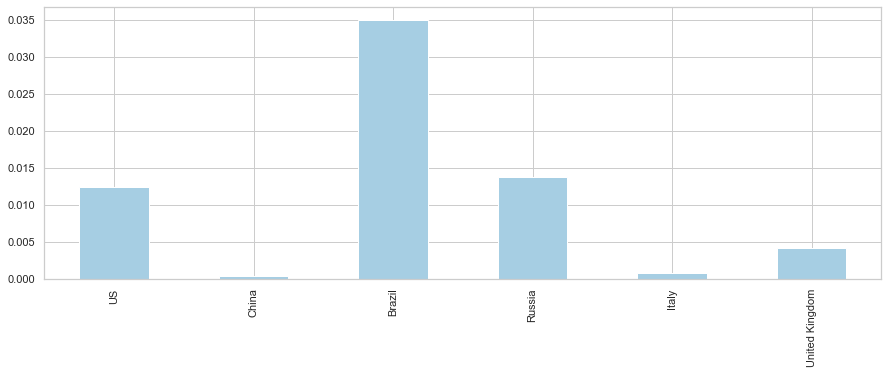

In [52]:
prominent_countries.plot(kind='bar', figsize=(15,5))

#### Hot Spots - Countries

*First, filter to only include countries with > 5,000 confirmed cases to exclude lesser affected countries*

In [53]:
countries_impacted_filter = jh_hist_countries_cases.loc[jh_hist_date]>5000
countries_impacted = jh_hist_countries_cases.loc[:, countries_impacted_filter].columns

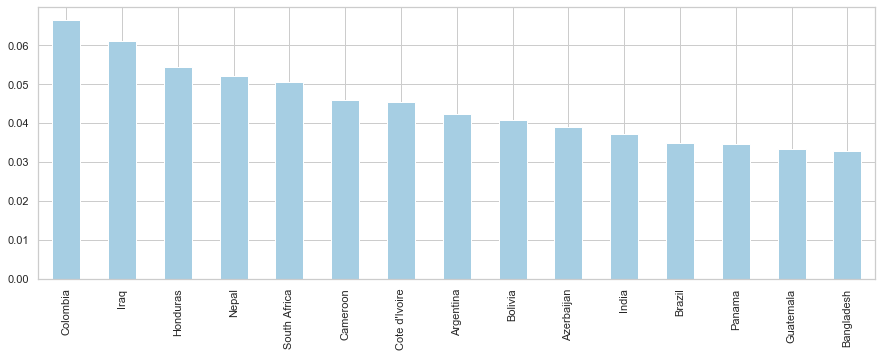

In [54]:
countries_hot_spots = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nlargest(15)
countries_hot_spots.plot(kind='bar', figsize=(15,5))

In [55]:
countries_hot_spots = countries_hot_spots.index.values

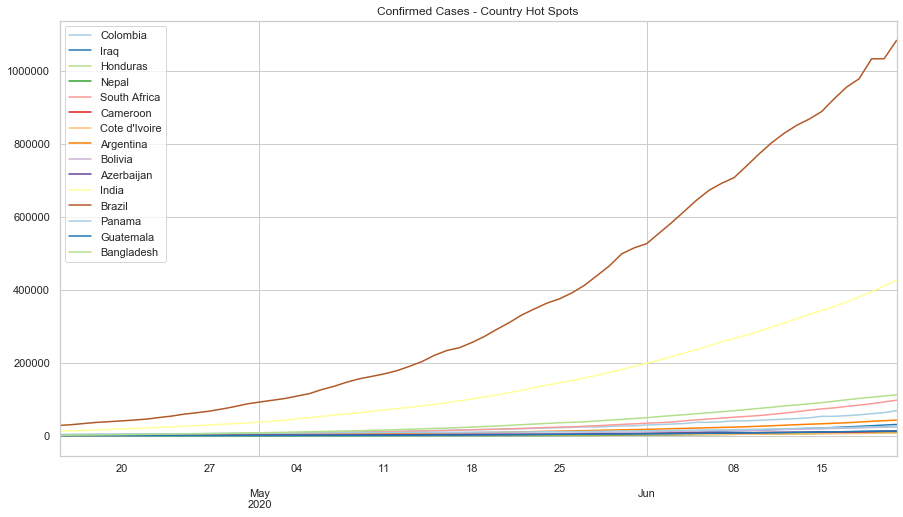

In [56]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots', figsize=(15,8))

**For comparison sake, include US, Russia, Brazil**

In [57]:
countries_hot_spots = np.append(countries_hot_spots, 'US')
countries_hot_spots = np.append(countries_hot_spots, 'Russia')
countries_hot_spots = np.append(countries_hot_spots, 'Brazil')

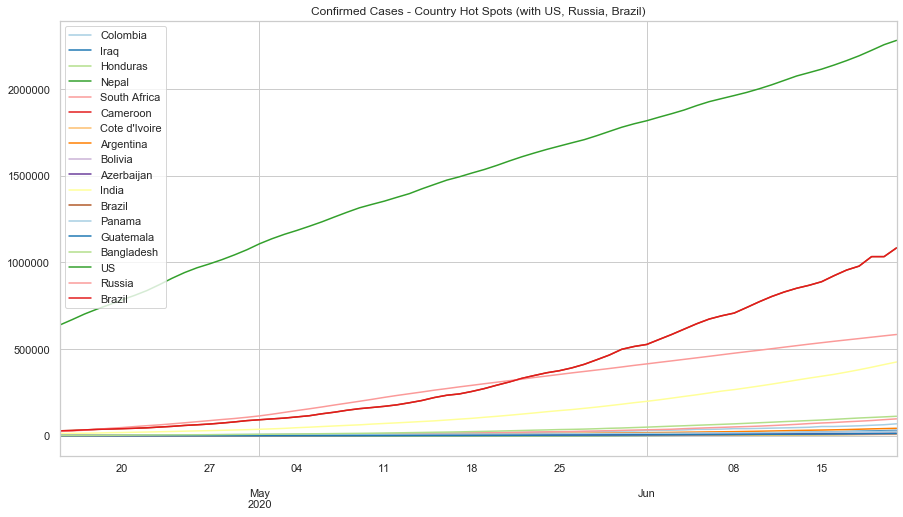

In [58]:
jh_hist_countries_cases.loc[zoom_date3:, countries_hot_spots].plot(title='Confirmed Cases - Country Hot Spots (with US, Russia, Brazil)', figsize=(15,8))

#### Cooling Down - Countries

*Note: this uses the same impacted countries filter used above for the hot spots to exclude countries with very small total case counts*

In [59]:
countries_cooling_down = jh_hist_countries_cases_pct_ewma.loc[jh_hist_date, countries_impacted].nsmallest(15)
countries_cooling_down

Ireland         0.000284
China           0.000343
Finland         0.000701
Belgium         0.000763
Italy           0.000834
Denmark         0.000916
Switzerland     0.001069
Norway          0.001163
Spain           0.001431
Austria         0.001792
Malaysia        0.001856
Netherlands     0.001885
France          0.002310
Korea, South    0.002838
Germany         0.002908
Name: 2020-06-21 00:00:00, dtype: float64

In [60]:
countries_cooling_down = countries_cooling_down.index.values

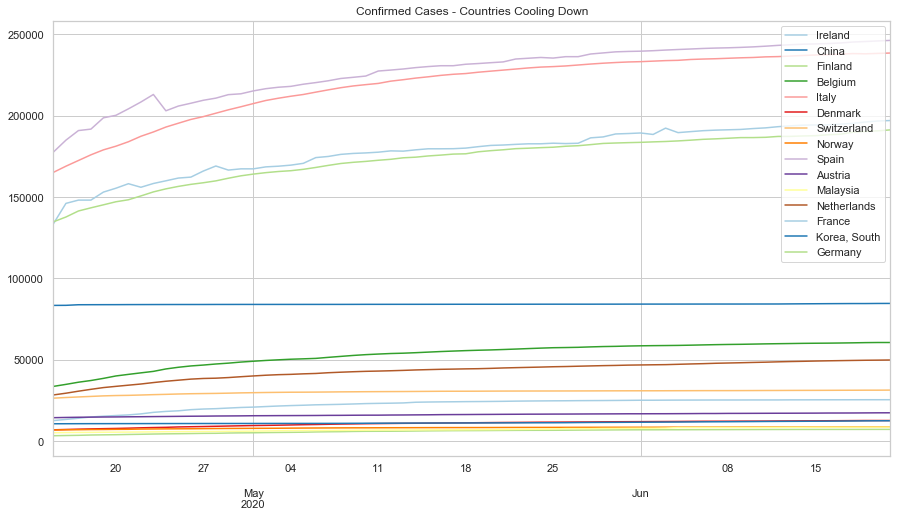

In [61]:
jh_hist_countries_cases.loc[zoom_date3:, countries_cooling_down].plot(title='Confirmed Cases - Countries Cooling Down', figsize=(15,8))

#### Hot Spots - US States

*First, filter out non-states from the data (Diamond princess, virgin islands, etc).  Use threshold of 500 cases which safely excludes non-states*

In [62]:
actual_states_filter = jh_hist_usstates_cases.loc[jh_hist_date] > 500
actual_states = jh_hist_usstates_cases.loc[jh_hist_date, actual_states_filter].index.values

In [63]:
usstates_hot_spots = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nlargest(12)
usstates_hot_spots

Arizona           0.058473
South Carolina    0.042927
Oklahoma          0.041917
Florida           0.039876
Texas             0.034937
Arkansas          0.032257
Montana           0.031410
Utah              0.029535
Nevada            0.025717
Hawaii            0.022311
California        0.021753
Missouri          0.020744
Name: 2020-06-21 00:00:00, dtype: float64

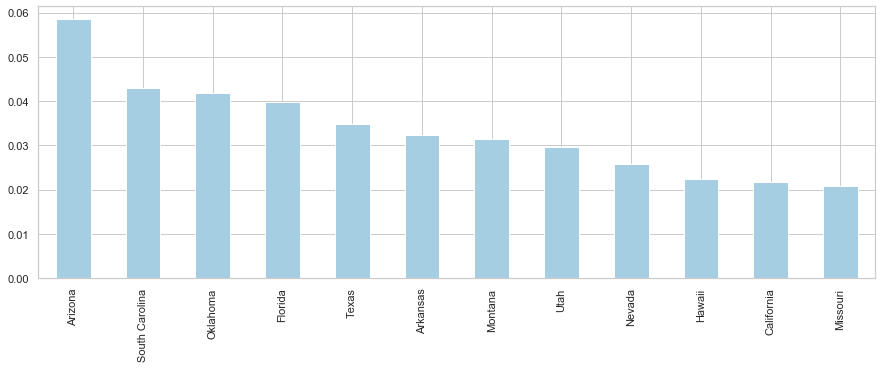

In [64]:
usstates_hot_spots.plot(kind='bar', figsize=(15,5))

In [65]:
usstates_hot_spots = usstates_hot_spots.index.values

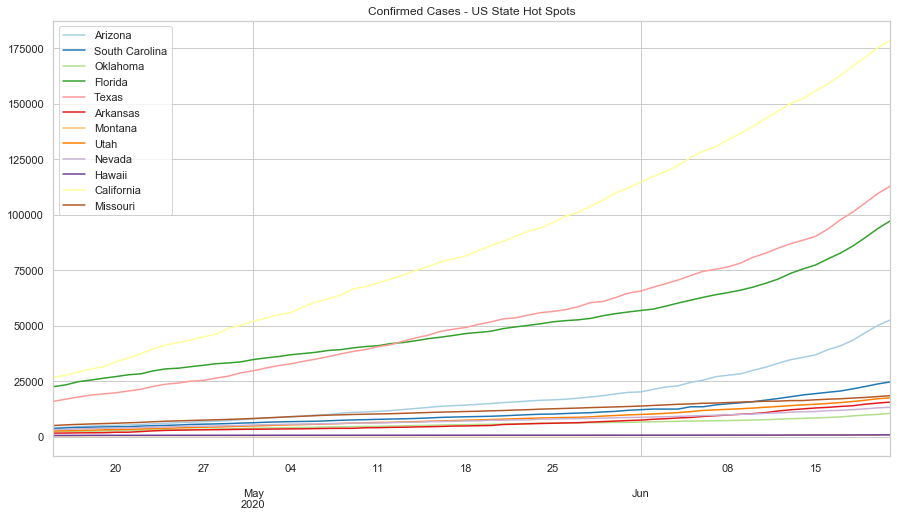

In [66]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_hot_spots].plot(title='Confirmed Cases - US State Hot Spots', figsize=(15,8))

#### Cooling Down - US States

In [67]:
usstates_cooling_down = jh_hist_usstates_cases_pct_ewma.loc[jh_hist_date, actual_states].nsmallest(10)
usstates_cooling_down

Rhode Island            0.000984
Mississippi             0.001252
New York                0.001779
Connecticut             0.001791
Massachusetts           0.001817
New Jersey              0.001962
District of Columbia    0.003776
Michigan                0.003919
Pennsylvania            0.004478
Illinois                0.004774
Name: 2020-06-21 00:00:00, dtype: float64

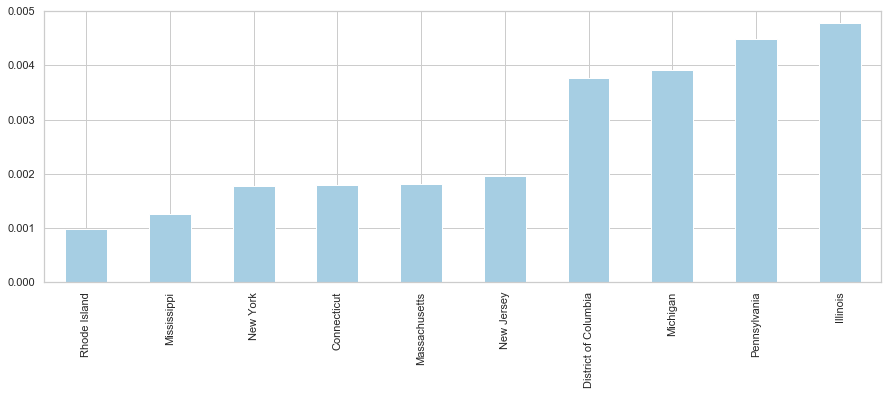

In [68]:
usstates_cooling_down.plot(kind='bar', figsize=(15,5))

In [69]:
usstates_cooling_down = usstates_cooling_down.index.values

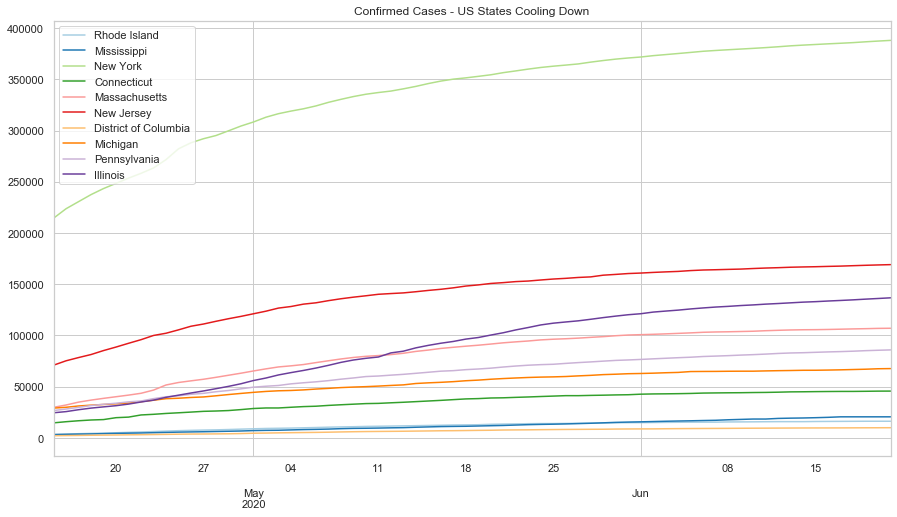

In [70]:
jh_hist_usstates_cases.loc[zoom_date3:, usstates_cooling_down].plot(title='Confirmed Cases - US States Cooling Down', figsize=(15,8))

#### Hot Spots - US Counties

`TODO - COMPLETE THIS SECTION`

#### Cooling Down - US Counties

`TODO - COMPLETE THIS SECTION`

**TODO NEXT:**  
- Finish ETL data wrangling and exporting with CTP and NYT data
- Get population data for each country / state and add to this report (may be easiest to just put in a csv file)
  - Also population density if possible
  - Add metrics based on poulation data (% of population infected, etc)
- Create new datasets that align start as of xx cases
    - 100+ confirmed cases
    - 10+ deaths
- Consider adding other datasets (Google location tracking?)
- More EDA and Data Viz
- Perform forecasting using the historic time series data
- Model out different scenarios: 
  - No changes
  - Lockdown
  - Extensive testing
  - Mandatory quarantines
  - Containment effectiveness score for each country (estimated)
  - Cure discovered
- Look into using Unity to model out scenarios, using simulated humans and the Global / US map tool I have